In [89]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

In [90]:
print(tf.test.is_gpu_available())

False


In [91]:
layer = keras.layers.Dense(100)
layer = keras.layers.Dense(10, input_shape=(None, 5))

In [92]:
layer(tf.zeros((4, 5)))

<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [93]:
layer.variables

[<tf.Variable 'dense_42/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.02215272,  0.60714966, -0.30964175, -0.41767114,  0.20562935,
         -0.10193408,  0.60973626,  0.5256707 ,  0.6305255 ,  0.33655822],
        [ 0.09629875,  0.13994211,  0.04591018, -0.46298814,  0.06403124,
          0.23145032,  0.33920187, -0.11125523,  0.2521469 ,  0.5664504 ],
        [-0.4719735 ,  0.5101728 , -0.2206012 , -0.47227812,  0.37179595,
         -0.01332915,  0.1455673 , -0.49416408,  0.58693   ,  0.10172868],
        [ 0.43575174, -0.6210782 , -0.16154268, -0.08539569,  0.6218943 ,
         -0.25986776, -0.15329903, -0.47731537,  0.0641911 , -0.6096921 ],
        [-0.57414025, -0.03140515,  0.06253284,  0.6228059 , -0.10540795,
         -0.4802642 ,  0.05083889, -0.21780059,  0.4497053 , -0.44216686]],
       dtype=float32)>,
 <tf.Variable 'dense_42/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

In [94]:
layer.kernel, layer.bias

(<tf.Variable 'dense_42/kernel:0' shape=(5, 10) dtype=float32, numpy=
 array([[-0.02215272,  0.60714966, -0.30964175, -0.41767114,  0.20562935,
         -0.10193408,  0.60973626,  0.5256707 ,  0.6305255 ,  0.33655822],
        [ 0.09629875,  0.13994211,  0.04591018, -0.46298814,  0.06403124,
          0.23145032,  0.33920187, -0.11125523,  0.2521469 ,  0.5664504 ],
        [-0.4719735 ,  0.5101728 , -0.2206012 , -0.47227812,  0.37179595,
         -0.01332915,  0.1455673 , -0.49416408,  0.58693   ,  0.10172868],
        [ 0.43575174, -0.6210782 , -0.16154268, -0.08539569,  0.6218943 ,
         -0.25986776, -0.15329903, -0.47731537,  0.0641911 , -0.6096921 ],
        [-0.57414025, -0.03140515,  0.06253284,  0.6228059 , -0.10540795,
         -0.4802642 ,  0.05083889, -0.21780059,  0.4497053 , -0.44216686]],
       dtype=float32)>,
 <tf.Variable 'dense_42/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>)

In [95]:
class MyDense(keras.layers.Layer):
    def __init__(self, num_inputs=32, 
                 kernel_initializer='glorot_uniform',
                 **kwargs):
        super(MyDense, self).__init__(**kwargs)
        self.num_inputs = num_inputs
        self.kernel_initializer = keras.initializers.get(kernel_initializer)
    
    def build(self, input_shape):
        super(MyDense, self).build(input_shape)
        weights = self.kernel_initializer(
            shape=(input_shape[-1], self.num_inputs),
        )
        self.kernel = tf.Variable(
            initial_value=weights,
            trainable=True,
            dtype=tf.float32,
        )
    
    def call(self, inputs):
        return tf.matmul(inputs, self.kernel)

dense = keras.layers.Dense(32, kernel_initializer='glorot_uniform')
mydense = MyDense(32, kernel_initializer='glorot_uniform')
inputs = tf.ones((10,10),)
outputs = mydense(inputs)
mydense.weights

[<tf.Variable 'my_dense_37/Variable:0' shape=(10, 32) dtype=float32, numpy=
 array([[ 2.79638171e-02, -7.96358585e-02,  2.61554122e-03,
         -2.19244599e-01,  1.57712668e-01, -3.38942409e-01,
         -7.04277754e-02,  1.00700498e-01,  1.17812902e-01,
         -4.13184166e-02,  1.32954568e-01, -2.91154683e-02,
          5.16826808e-02, -9.87715125e-02, -4.77222502e-02,
         -5.27399778e-02,  2.46566981e-01,  7.75732398e-02,
          1.70488745e-01,  6.26974404e-02, -7.75954127e-02,
          9.03993845e-03,  6.12774491e-02, -1.70327723e-02,
          3.25601906e-01, -3.00133586e-01, -1.15697771e-01,
         -1.95661917e-01, -3.26455534e-01, -1.74144015e-01,
          1.62596375e-01,  1.62027866e-01],
        [-1.63748398e-01,  2.01058537e-01,  3.76936346e-01,
         -7.39484131e-02, -2.34411106e-01,  1.49326771e-01,
         -3.53422970e-01,  3.77527207e-01, -1.18183196e-01,
          1.83539480e-01, -1.24734730e-01, -1.92560554e-02,
         -2.04868928e-01,  9.52703357e-0

In [96]:
class ComputeSum(keras.layers.Layer):
    def __init__(self, input_dim):
        super(ComputeSum, self).__init__()
        self.total = tf.Variable(initial_value=tf.zeros((input_dim,)),
                                trainable=False)
    
    def call(self, inputs):
        self.total.assign_add(tf.reduce_sum(inputs, axis=0))
        return self.total
    
my_sum = ComputeSum(10)
for _ in range(4):
    my_sum(tf.ones((4,10)))

my_sum.total

<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([16., 16., 16., 16., 16., 16., 16., 16., 16., 16.], dtype=float32)>

## Models: Composing layers

In [99]:
class ResnetIdentityBlock(keras.models.Model):
    def __init__(self, kernel_size, filters):
        super(ResnetIdentityBlock, self).__init__(name='')
        filter1, filter2, filter3 = filters
        
        self.conv2a = keras.layers.Conv2D(filter1, (1, 1))
        self.bn2a = keras.layers.BatchNormalization()
        
        self.conv2b = keras.layers.Conv2D(filter2,
                                          kernel_size, 
                                          padding='same')
        self.bn2b = keras.layers.BatchNormalization()
        
        self.conv2c = keras.layers.Conv2D(filter3, (1, 1))
        self.bn2c = keras.layers.BatchNormalization()
        
    def call(self, inputs, training=False):
        x = self.conv2a(inputs)
        x = self.bn2a(x, training=training)
        x = tf.nn.relu(x)
        
        
        x = self.conv2b(x)
        x = self.bn2b(x, training=training)
        x = tf.nn.relu(x)
        
        x = self.conv2c(x)
        x = self.bn2c(x, training=training)
        
        
        x+= inputs
        return tf.nn.relu(x)
        
        
        
block = ResnetIdentityBlock(1, [1,2,3])

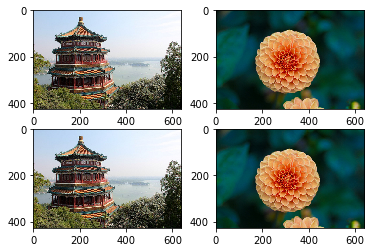

In [144]:
from sklearn.datasets import load_sample_image

china = load_sample_image('china.jpg')
flower = load_sample_image('flower.jpg')

images = np.array([china, flower], dtype=np.float32)
scaled_images = images / 255

processed = block(scaled_images)

fig, ax = plt.subplots(2,2)

for ax, img in zip( ax.ravel(), np.concatenate((scaled_images,
                                                processed))):
    ax.imshow(img)

In [143]:

prep_images = tf.keras.applications.resnet50.preprocess_input(images)
resnet = keras.applications.ResNet50()
resnet(prep_images)

<tf.Tensor: shape=(2, 1000), dtype=float32, numpy=
array([[1.4326744e-05, 2.6986514e-05, 4.7569178e-05, ..., 7.1763125e-06,
        5.5014170e-05, 2.5026899e-05],
       [5.4079988e-05, 1.3335050e-03, 1.1318271e-04, ..., 1.1136455e-03,
        7.1525695e-03, 1.5261895e-03]], dtype=float32)>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


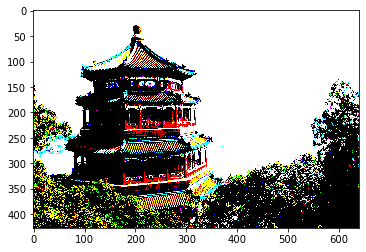

In [212]:
def bgr_to_rgb(resnet_image):
    return tf.reverse(resnet_image, axis=[-1])

plt.imshow(bgr_to_rgb(prep_images)[0,...])

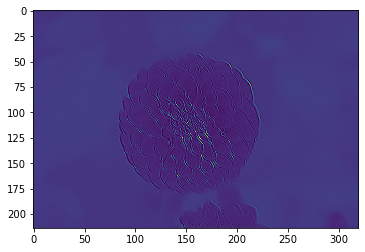

In [268]:
model = keras.models.Sequential(resnet.layers[:5])
plt.imshow( bgr_to_rgb(model(prep_images))[1,...,6] )

In [243]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_13[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________